## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
len(combined_mouse_data["Mouse ID"].value_counts())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouseid_timepoint = combined_mouse_data[combined_mouse_data.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
duplicated_mouseid_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_all = combined_mouse_data[combined_mouse_data.duplicated(keep=False)]
duplicated_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = combined_mouse_data.drop_duplicates(subset=["Mouse ID","Timepoint"],keep=False)
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_data["Mouse ID"].value_counts())

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_mouse_data["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_groups = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]

In [10]:
tumor_volume_mean = drug_regimen_groups.mean()
tumor_volume_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.458254
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [11]:
tumor_volume_median = drug_regimen_groups.median()
tumor_volume_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [12]:
tumor_volume_var = drug_regimen_groups.var()
tumor_volume_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     44.053659
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [13]:
tumor_volume_std = drug_regimen_groups.std()
tumor_volume_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.637293
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [14]:
tumor_volume_sem = drug_regimen_groups.sem()
tumor_volume_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.540135
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [15]:
tumor_volume_df = pd.DataFrame({"Mean":tumor_volume_mean,
                              "Median":tumor_volume_median,
                              "Variance":tumor_volume_var,
                              "Standard Deviation":tumor_volume_std,
                              "SEM":tumor_volume_sem})
tumor_volume_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Capomulin_data = tumor_volume_df.iloc[0, :]
Capomulin_data

Mean                  40.675741
Median                41.557809
Variance              24.947764
Standard Deviation     4.994774
SEM                    0.329346
Name: Capomulin, dtype: float64

In [17]:
Ceftamin_data = tumor_volume_df.iloc[1, :]
Ceftamin_data

Mean                  52.591172
Median                51.776157
Variance              39.290177
Standard Deviation     6.268188
SEM                    0.469821
Name: Ceftamin, dtype: float64

In [18]:
Infubinol_data = tumor_volume_df.iloc[2, :]
Infubinol_data

Mean                  52.884795
Median                51.820584
Variance              43.128684
Standard Deviation     6.567243
SEM                    0.492236
Name: Infubinol, dtype: float64

In [19]:
Ketapril_data = tumor_volume_df.iloc[3, :]
Ketapril_data

Mean                  55.235638
Median                53.698743
Variance              68.553577
Standard Deviation     8.279709
SEM                    0.603860
Name: Ketapril, dtype: float64

In [20]:
Naftisol_data = tumor_volume_df.iloc[4, :]
Naftisol_data

Mean                  54.331565
Median                52.509285
Variance              66.173479
Standard Deviation     8.134708
SEM                    0.596466
Name: Naftisol, dtype: float64

In [21]:
Placebo_data = tumor_volume_df.iloc[5, :]
Placebo_data

Mean                  54.033581
Median                52.288934
Variance              61.168083
Standard Deviation     7.821003
SEM                    0.581331
Name: Placebo, dtype: float64

In [22]:
Propriva_data = tumor_volume_df.iloc[6, :]
Propriva_data

Mean                  52.458254
Median                50.854632
Variance              44.053659
Standard Deviation     6.637293
SEM                    0.540135
Name: Propriva, dtype: float64

In [23]:
Ramicane_data = tumor_volume_df.iloc[7, :]
Ramicane_data

Mean                  40.216745
Median                40.673236
Variance              23.486704
Standard Deviation     4.846308
SEM                    0.320955
Name: Ramicane, dtype: float64

In [24]:
Stelasyn_data = tumor_volume_df.iloc[8, :]
Stelasyn_data

Mean                  54.233149
Median                52.431737
Variance              59.450562
Standard Deviation     7.710419
SEM                    0.573111
Name: Stelasyn, dtype: float64

In [25]:
Zoniferol_data = tumor_volume_df.iloc[9, :]
Zoniferol_data

Mean                  53.236507
Median                51.818479
Variance              48.533355
Standard Deviation     6.966589
SEM                    0.516398
Name: Zoniferol, dtype: float64

In [26]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_groups_stats = drug_regimen_groups.agg([np.mean, np.median, np.var, np.std, st.sem])
drug_regimen_groups_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [27]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_drug_regimen_groups = clean_mouse_data.groupby("Drug Regimen")
mice_drug_regimen_groups.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [28]:
unique_mice_drug_regimen = (mice_drug_regimen_groups.agg({"Mouse ID":"nunique"})).rename(columns={"Mouse ID":"Unique Mice Counts"})
unique_mice_drug_regimen

,Unique Mice Counts
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,25
Ramicane,25
Stelasyn,24


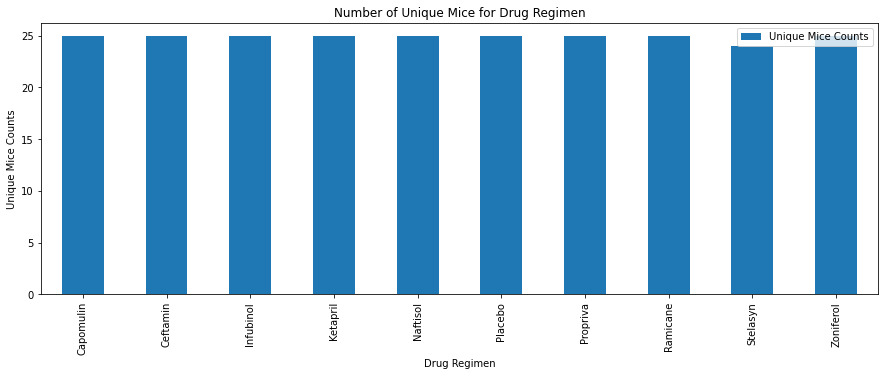

<Figure size 432x288 with 0 Axes>

In [29]:
unique_mice_drug_regimen.plot(kind="bar", figsize=(15,5), title="Number of Unique Mice for Drug Regimen")
plt.ylabel("Unique Mice Counts")
plt.show()
plt.tight_layout()

In [30]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(unique_mice_drug_regimen))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
x_ticklabels = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

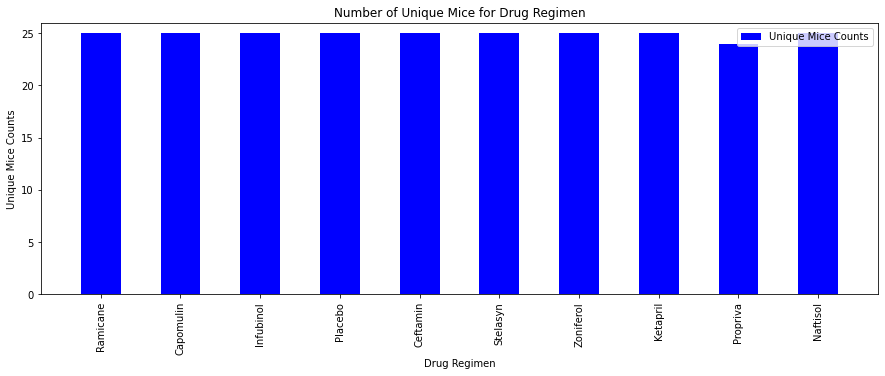

In [51]:
plt.figure(figsize=(15,5))
plt.bar(x_axis, unique_mice_drug_regimen["Unique Mice Counts"], color='b', align="center", width=0.5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_ticklabels, rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(unique_mice_drug_regimen["Unique Mice Counts"])+1)
plt.title("Number of Unique Mice for Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Unique Mice Counts")
plt.legend(unique_mice_drug_regimen, loc="upper right")

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_groups = clean_mouse_data.groupby("Sex")
mice_gender_groups.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [109]:
unique_mice_gender = (mice_gender_groups.agg({"Mouse ID":"nunique"})).rename(columns={"Mouse ID":"Gender Counts"})
unique_mice_gender

,Gender Counts
Sex,
Female,124
Male,125


<AxesSubplot:title={'center':'Mice Gender Counts'}, ylabel='Gender Counts'>

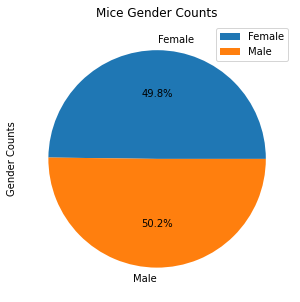

In [140]:
unique_mice_gender.plot.pie(y="Gender Counts", figsize=(5, 5), autopct="%1.1f%%", title="Mice Gender Counts")

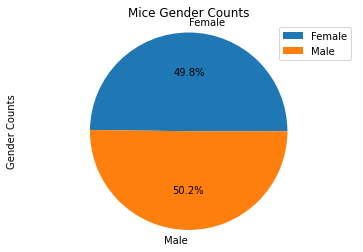

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
plt.pie(unique_mice_gender["Gender Counts"],labels=labels,autopct="%1.1f%%")
plt.axis("equal")
plt.title("Mice Gender Counts")
plt.ylabel("Gender Counts")
plt.legend(tick_labels, loc="upper right")

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [36]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [39]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
